In [1]:
# importing module
import sys
import spacy
import os

import pandas as pd
import spacy
import networkx as nx


In [2]:
# appending a path
sys.path.append('lib/utils/')
 
# importing required module
from functions import *

In [3]:
# Initialize empty list for graphs from books
books_graph = []
# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if b.name.endswith('.pdf')]
# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

In [4]:
character_df = pd.read_csv("characters_ref.csv")

In [7]:
# Loop through book list and create graphs
nlp = spacy.load("en_core_web_sm")
for book in all_books:
    # Specify the starting page
    if book.name == '0 - Hunger Games.pdf' or book.name == '1 - Catching Fire.pdf' :
        start_page = 3 # hunger games, catching fire
    else:
        start_page =  12 #mockinjay

    book_text = ner(book.path, start_page, nlp)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                          
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\camil\AppData\Local\Temp\ipykernel_8004\2845682744.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\camil\AppData\Local\Temp\ipykernel_8004\2845682744.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\camil\AppData\Local\Tem

   Buttercup      Prim      Gale   Katniss     Effie    Greasy     Madge  \
0   0.076923  0.423077  0.500000  0.461538  0.423077  0.153846  0.346154   
1   0.038462  0.346154  0.461538  0.365385  0.326923  0.115385  0.173077   
2   0.204082  0.244898  0.653061  0.326531  0.122449  0.122449  0.020408   

   Haymitch     Peeta   Johanna  ...    Castor  Coriolanus      Lyme  \
0  0.576923  0.730769  0.038462  ...       NaN         NaN       NaN   
1  0.576923  0.673077  0.250000  ...       NaN         NaN       NaN   
2  0.469388  0.673469  0.306122  ...  0.102041    0.020408  0.081633   

       York  Jackson      Leeg  Mitchell     Homes   Lavinia    Tigris  
0       NaN      NaN       NaN       NaN       NaN       NaN       NaN  
1       NaN      NaN       NaN       NaN       NaN       NaN       NaN  
2  0.020408  0.22449  0.204082  0.122449  0.142857  0.020408  0.163265  

[3 rows x 70 columns]


<Axes: >

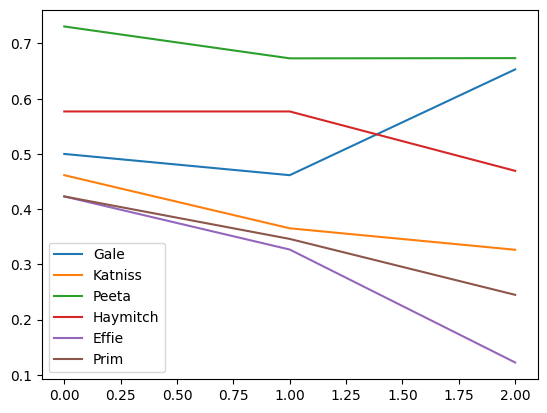

In [9]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]
# print(evol)
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)
print(degree_evol_df)

# Plotting the degree centrality evolution of 6 main characters
degree_evol_df[["Gale", "Katniss", "Peeta", "Haymitch", "Effie", "Prim"]].plot()
